### Importação das bibliotecas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

import rasterio as rst
from rasterio.mask import mask

In [3]:
florestal = gpd.read_file('D:/thesis_data/ROI/classes/form_florestal_30m_32723.geojson')
savanica = gpd.read_file('D:/thesis_data/ROI/classes/form_savanica_30m_32723.geojson')
campestre = gpd.read_file('D:/thesis_data/ROI/classes/form_campestre_30m_32723.geojson')
agua = gpd.read_file('D:/thesis_data/ROI/classes/form_florestal_10m_32723.GEOJSON')

In [18]:
geometries = [geom for geom in campestre.geometry]

with rst.open('D:/thesis_data/VEG_INDICES/dprvi_parameters/dprvi_parameters_20170524T084452.tif') as raster:
    out_image, out_trasnform = mask(raster, geometries, crop=True, nodata=np.nan)

    dprvi = out_image[0]
    dop = out_image[1]
    lambda1 = out_image[2]
    lambda2 = out_image[3]
    beta = out_image[4]

In [4]:
dop_f = pd.read_csv('D:/thesis_data/VEG_INDICES/dprvi_parameters/stats/florestal_DOP.csv')
dop_s = pd.read_csv('D:/thesis_data/VEG_INDICES/dprvi_parameters/stats/savanica_DOP.csv')
dop_c = pd.read_csv('D:/thesis_data/VEG_INDICES/dprvi_parameters/stats/campestre_DOP.csv')

beta_f = pd.read_csv('D:/thesis_data/VEG_INDICES/dprvi_parameters/stats/florestal_Beta.csv')
beta_s = pd.read_csv('D:/thesis_data/VEG_INDICES/dprvi_parameters/stats/savanica_Beta.csv')
beta_c = pd.read_csv('D:/thesis_data/VEG_INDICES/dprvi_parameters/stats/campestre_Beta.csv')

In [5]:
beta_f = beta_f['median']
dop_f= dop_f['median']

beta_s = beta_s['median']
dop_s= dop_s['median']

beta_c = beta_c['median']
dop_c = dop_c['median']

In [8]:
beta_c

0      0.764685
1      0.764098
2      0.753647
3      0.747323
4      0.779345
         ...   
144    0.735618
145    0.762295
146    0.754369
147    0.739614
148    0.755627
Name: median, Length: 149, dtype: float64

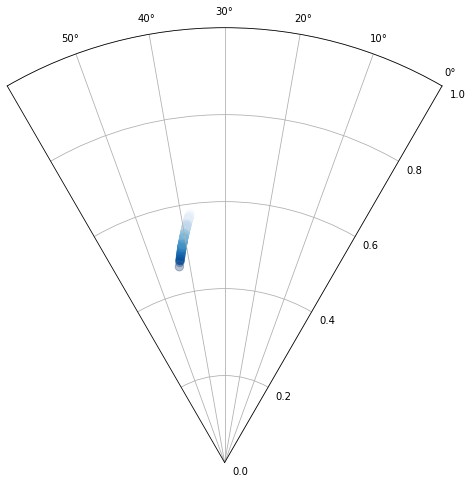

In [26]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar=True)

ax.scatter(np.arccos(beta_c), dop_c, c=np.arccos(beta_c), s=70, cmap='Blues', alpha=0.3)

#ax.scatter(np.arccos(beta_s), dop_s, c=np.arccos(beta_s), s=70, cmap='Reds', alpha=0.3)

#ax.scatter(np.arccos(beta_f), dop_f, c=np.arccos(beta_f), s=70, cmap='Greens', alpha=0.3)

ax.set_thetamin(0)
ax.set_thetamax(60)

thetaticks = np.arange(0,60,10)
ax.set_thetagrids(thetaticks)

ax.set_rmax(1.0)
ax.set_theta_zero_location('NE', offset=15)

ax.tick_params(axis='y', length=5, width=1.5, labelsize=10)
ax.tick_params(axis='x', length=5, width=1.5, labelsize=10)